<a href="https://colab.research.google.com/github/tlysenko/bionformatics-coursera-sandiego/blob/main/Finding%20Hidden%20Messages%20in%20DNA%20(Bioinformatics%20I)/Bioinformatics_1_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [4]:
import pandas as pd
import numpy as np
from google.colab import files
import itertools

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## 1.3 Give all values of Skew_i (GAGCCACCGCGATA) for i ranging from 0 to 14.



In [50]:
def CalculateSkew(genome):
  r = len(genome) + 1
  skew = [0] * r
  for i in range(r):
    subs = genome[0:i]
    skew[i] = Counter(subs)['G'] - Counter(subs)['C']
  return skew
def PlotSkew(skew):
  plt.figure(figsize=(10,5))
  ax = sns.lineplot(x=range(len(skew)),y=skew);
  ax.set(xlabel='position', ylabel='Skew (C-G)')
  plt.show()
  return 

In [51]:
genome = 'CATGGGCATCGGCCATACGCC'
skew = CalculateSkew(genome)
skew

[0, -1, -1, -1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, -1, 0, -1, -2]

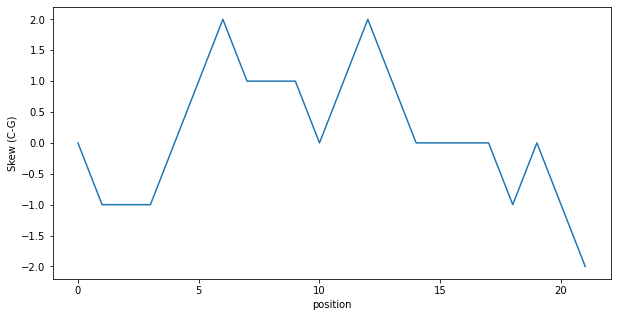

In [34]:
PlotSkew(skew)

In [36]:
genome='GAGCCACCGCGATA'
skew = CalculateSkew(genome)
skew

[0, 1, 1, 2, 1, 0, 0, -1, -2, -1, -2, -1, -1, -1, -1]

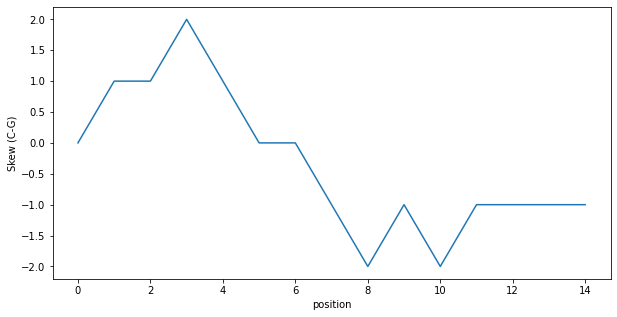

In [37]:
PlotSkew(skew)

## 1.3 E-coli Skew diagram

In [61]:
import urllib.request
url = 'http://bioinformaticsalgorithms.com/data/realdatasets/Rearrangements/E_coli.txt'
response = urllib.request.urlopen(url)
genome = response.read().decode('ascii')

len(genome)

4639675

In [68]:
def CalculateSkew(genome, step):
  r = len(genome) + 1
  skew = [0]
  for i in range(0,r,step):     
    subs = genome[0:i+step]    
    skew.append(Counter(subs)['G'] - Counter(subs)['C'])
  return skew

def PlotSkew(skew):
  plt.figure(figsize=(10,5))
  ax = sns.lineplot(x=range(len(skew)),y=skew);
  ax.set(xlabel='position', ylabel='Skew (C-G)', title = 'Skew diagram')
  plt.show()
  return 

In [ ]:
skew = CalculateSkew(genome, 100000)

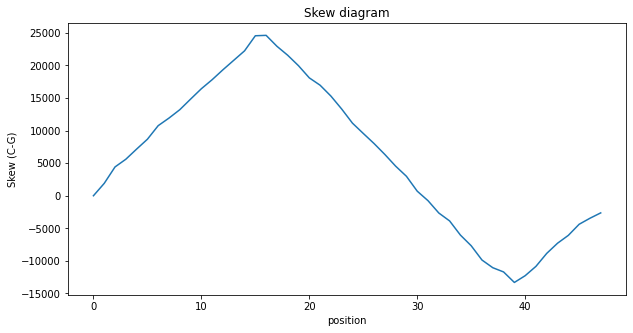

In [76]:
PlotSkew(skew)

## 1.3 Code Challenge: Solve the Minimum Skew Problem.

Input: A DNA string Genome.

Output: All integer(s) i minimizing Skewi (Genome) among all values of i (from 0 to |Genome|).


In [ ]:
genome = 'TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT'

In [ ]:
def MinSkew(genome):

  return